In [67]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import codecs

# MNIST

In [68]:
# top-1
with open("topk_log.txt") as f:
    l = f.readlines()
top1_labels = eval(l[1])
true_labels = eval(l[2])

## Top-1で間違えたインスタンスを記録

In [69]:
indexes = [i for i, (generated_l, true_l) in enumerate(zip(top1_labels, true_labels)) if (generated_l[0] != true_l)]
for_failed_true = [true_labels[i] for i in indexes]

In [70]:
# Tsallis
with open("tsallis_log.txt") as f:
    l = f.readlines()
vs = [i for i in range(1, 22, 2)]
tsallis_labels = [eval(l[v]) for v in vs] # generated labels
# true_labels = eval(l[20]) # true labels

## Top-1で間違えたインスタンスに対してTsallisが付与したラベル集合の精度を計算

In [72]:
for_failed_tsallis = []
for labels_set in tsallis_labels:
    for_failed_tsallis.append([labels_set[i] for i in indexes])

[[4, 2, 6, 0, 5, 8, 9, 1, 7], [8, 5, 0, 6, 2, 9, 3, 4, 1], [9, 8, 4, 6, 5, 0, 2, 1, 3]]
[[0, 2, 4, 5, 6, 8, 9], [0, 5, 6, 8], [4, 8, 9]]
[[0, 2, 4, 5, 6], [0, 5, 8], [8, 9]]
[[0, 2, 4, 6], [5, 8], [8, 9]]
[[4], [5, 8], [9]]
[[4], [5, 8], [9]]
[[4], [8], [9]]
[[4], [8], [9]]
[[4], [8], [9]]
[[4], [8], [9]]
[[4], [8], [9]]


In [90]:
def acc_calc(l_set, for_failed_true):
    score = 0
    total_lnum = 0
    for labels, t_label in zip(l_set, for_failed_true):
        total_lnum += len(labels)
        if (t_label in labels):
            score += 1 
    return (total_lnum/len(for_failed_true), score*100/total_lnum)

In [170]:
acc_tsallis = [acc_calc(l_set, for_failed_true)[1] for l_set in for_failed_tsallis]
avelnum_tsallis = [acc_calc(l_set, for_failed_true)[0] for l_set in for_failed_tsallis]

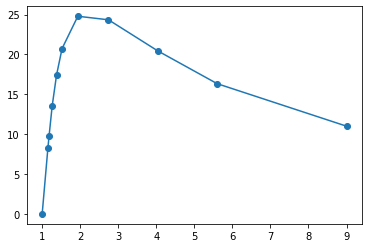

In [171]:
plt.figure()
plt.plot(avelnum_tsallis, acc_tsallis, marker = 'o')
plt.show()

## Top-1で間違えたインスタンスに対してTop-Rが付与したラベル

In [133]:
# top-r
with open("topr_log.txt") as f:
    l = f.readlines()
topr_indexes = [j for j in range(5, 30, 6)] + [j for j in range(36, 61, 6)] + [j for j in range(67, 92, 6)] + [j for j in range(98, 123, 6)]
topr_sets = [eval(l[i]) for i in topr_indexes]
top1_indexes = [j for j in range(7, 32, 6)] + [j for j in range(38, 63, 6)] + [j for j in range(69, 94, 6)] + [j for j in range(100, 125, 6)]
top1_sets = [eval(l[i]) for i in top1_indexes]
true_indexes = [j for j in range(9, 34, 6)] + [j for j in range(40, 65, 6)] + [j for j in range(71, 96, 6)] + [j for j in range(102, 127, 6)]
true_sets = [eval(l[i]) for i in true_indexes]

In [134]:
indexes_sets = [[i for i, (generated_l, true_l) in enumerate(zip(top1_labels, true_labels)) if (generated_l[0] != true_l)] for top1_labels, true_labels in zip(top1_sets, true_sets)]
for_failed_true_sets = [[true_labels[i] for i in true_indexes] for topr_labels, true_indexes in zip(topr_sets, indexes_sets)]

In [135]:
for_failed_topr_sets = []
for topr_labels, indexes in zip(topr_sets, indexes_sets):
    for_failed_topr_sets.append([topr_labels[i] for i in indexes])

In [136]:
acc_topr = [acc_calc(l_set, for_failed_true)[1] for l_set, for_failed_true in zip(for_failed_topr_sets, for_failed_true_sets)]
avelnum_topr = [acc_calc(l_set, for_failed_true)[0] for l_set in zip(for_failed_topr_sets, for_failed_true_sets)]

In [137]:
acc_topr

[10.054347826086957,
 10.962566844919786,
 7.563025210084033,
 9.946236559139784,
 9.917355371900827,
 9.699769053117782,
 10.120481927710843,
 8.76777251184834,
 11.91588785046729,
 11.682242990654206,
 8.383233532934131,
 12.396694214876034,
 8.130081300813009,
 10.450819672131148,
 12.394957983193278,
 9.497206703910615,
 10.26615969581749,
 9.586466165413533,
 7.393715341959335,
 10.382513661202186]

In [138]:
avelnum_topr

[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0]

In [145]:
[(acc_topr[i] + acc_topr[i + 1] + acc_topr[i + 2] + acc_topr[i + 3] + acc_topr[i + 4])/5 for i in range(0, 16, 5)]

[9.688706362426277, 10.437230866759691, 10.35115734078952, 9.425212313660632]

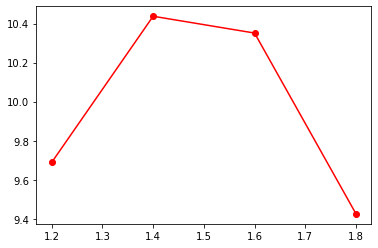

In [147]:
plt.figure()
plt.plot([1.2, 1.4, 1.6, 1.8], [9.688706362426277, 10.437230866759691, 10.35115734078952, 9.425212313660632], color = 'r', marker = 'o')
plt.show()